***Anurag Sharma (24AI91R01)***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Task 1

In [2]:
# Loading the dataset from the given csv file
df = pd.read_csv('/content/UCI_Real_Estate_Valuation.csv')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Show the columns in the dataframe
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [5]:
# to get an overview of the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# Task 2

In [6]:
# to remove any duplicate entries from the dataframe
df.drop_duplicates(inplace=True)

In [7]:
# we fill missing values in numerical columns with their respective mean values
# because the dataset is small we don't drop any row having null values
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df.fillna({col: df[col].mean()}, inplace=True)

# Function to standardize numerical features
def standardize_features(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

# Task 3

In [8]:
# Split the dataset into training (70%) and a temporary set (30%)
train_set, temp_set = train_test_split(df, test_size=0.3, random_state=42)

# Further split the temporary set into validation (15%) and test (15%) sets
validation_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

# Print the shapes of the training, validation, and test sets
print(f"Training set shape: {train_set.shape}")
print(f"Validation set shape: {validation_set.shape}")
print(f"Test set shape: {test_set.shape}")

# Prepare the features and target variable for training and validation
X_train = train_set.drop('Y house price of unit area', axis=1)
y_train = train_set['Y house price of unit area']
X_validation = validation_set.drop('Y house price of unit area', axis=1)
y_validation = validation_set['Y house price of unit area']

# Standardize the features
X_train = standardize_features(X_train)
X_validation = standardize_features(X_validation)

Training set shape: (289, 8)
Validation set shape: (62, 8)
Test set shape: (63, 8)


# Task 4

In [9]:
# 1) Training with a polynomial kernel
svr_poly_model = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)
print(svr_poly_model)
svr_poly_model.fit(X_train, y_train)
y_pred_poly = svr_poly_model.predict(X_validation)
mse_poly = mean_squared_error(y_validation, y_pred_poly)
print(f"Mean Squared Error (Polynomial Kernel): {mse_poly}")

# 2) Training with an RBF kernel
svr_rbf_model = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale')
print(svr_rbf_model)
svr_rbf_model.fit(X_train, y_train)
y_pred_rbf = svr_rbf_model.predict(X_validation)
mse_rbf = mean_squared_error(y_validation, y_pred_rbf)
print(f"Mean Squared Error (RBF Kernel): {mse_rbf}")

SVR(kernel='poly')
Mean Squared Error (Polynomial Kernel): 112.20071226614256
SVR()
Mean Squared Error (RBF Kernel): 93.75342324024086


# Task 5

In [10]:
# Parameter tuning for the polynomial kernel
param_grid_poly = {'degree': [2, 3, 4, 5]}
svr_poly_model = SVR(kernel='poly', C=1.0, epsilon=0.1)

# Setting up GridSearchCV for the polynomial kernel
grid_search_poly = GridSearchCV(svr_poly_model, param_grid_poly, cv=5, scoring='neg_mean_squared_error')
grid_search_poly.fit(X_train, y_train)

# Display the optimal degree for the polynomial kernel
print(f"Optimal degree for polynomial kernel: {grid_search_poly.best_params_['degree']}")

Optimal degree for polynomial kernel: 3


In [11]:
# Parameter tuning for the RBF kernel
param_grid_rbf = {'gamma': ['scale', 'auto', 0.1, 1, 10]}
svr_rbf_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Setting up GridSearchCV for the RBF kernel
grid_search_rbf = GridSearchCV(svr_rbf_model, param_grid_rbf, cv=5, scoring='neg_mean_squared_error')
grid_search_rbf.fit(X_train, y_train)

# Display the optimal gamma value for the RBF kernel
print(f"Optimal gamma for RBF kernel: {grid_search_rbf.best_params_['gamma']}")

Optimal gamma for RBF kernel: 0.1


# Task 6

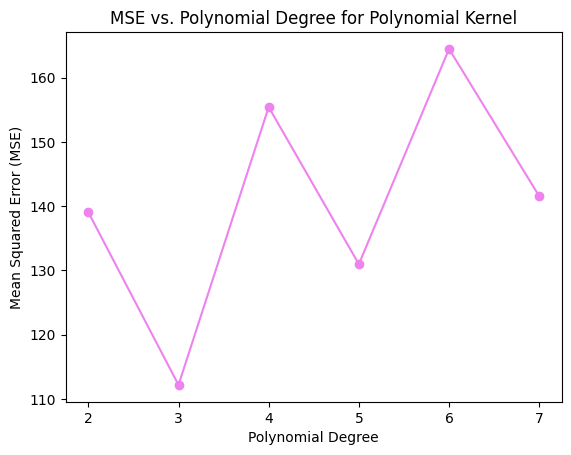

In [12]:
# Evaluate the impact of polynomial degree on performance
mse_degree_scores = []
degrees_range = [2, 3, 4, 5, 6, 7]

for degree in degrees_range:
    svr_poly = SVR(kernel='poly', degree=degree, C=1.0, epsilon=0.1)
    svr_poly.fit(X_train, y_train)
    y_pred_poly = svr_poly.predict(X_validation)
    mse_poly = mean_squared_error(y_validation, y_pred_poly)
    mse_degree_scores.append(mse_poly)

# Plotting MSE against polynomial degrees
plt.plot(degrees_range, mse_degree_scores, marker='o', color='violet')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Polynomial Degree for Polynomial Kernel")
plt.show()

In [13]:
# Identify the best polynomial degree based on MSE scores
best_poly_degree = degrees_range[mse_degree_scores.index(min(mse_degree_scores))]
print(f"The optimal polynomial degree is: {best_poly_degree}")

The optimal polynomial degree is: 3


# Task 7

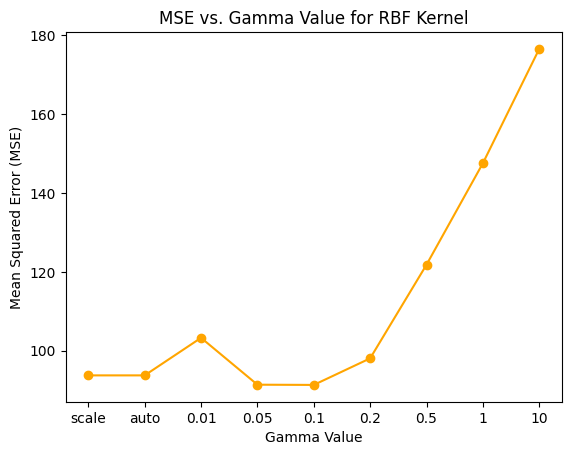

The optimal gamma value is: 0.1


In [19]:
# we evaluate the impact of gamma value on performance for RBF kernel
mse_gamma_scores = []
gamma_options = ['scale', 'auto', 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10]

for gamma in gamma_options:
    svr_rbf = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma=gamma)
    svr_rbf.fit(X_train, y_train)
    y_pred_rbf = svr_rbf.predict(X_validation)
    mse_rbf = mean_squared_error(y_validation, y_pred_rbf)
    mse_gamma_scores.append(mse_rbf)

# plotting MSE against gamma values
plt.plot(gamma_options, mse_gamma_scores, marker='o', color='orange')
plt.xlabel("Gamma Value")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Gamma Value for RBF Kernel")
plt.show()

# Identify the best gamma based on MSE scores
best_gamma_index = mse_gamma_scores.index(min(mse_gamma_scores))
best_gamma_value = gamma_options[best_gamma_index]
print(f"The optimal gamma value is: {best_gamma_value}")

# Task 8

In [20]:
# Train the best SVR model based on MSE comparison
if mse_poly < mse_rbf:
    best_svr_model = SVR(kernel='poly', degree=best_poly_degree, C=1.0, epsilon=0.1)
    print("Polynomial Kernel SVR is the best model.")
else:
    best_svr_model = SVR(kernel='rbf', gamma=best_gamma_value, C=1.0, epsilon=0.1)
    print("RBF Kernel SVR is the best model.")

# Fit the best model on the training data
best_svr_model.fit(X_train, y_train)

Polynomial Kernel SVR is the best model.


SVR(kernel='poly')

In [21]:
# Evaluate the performance of the best model on the test set
y_pred_best_model = best_svr_model.predict(test_set.drop('Y house price of unit area', axis=1))
mse_best_model = mean_squared_error(test_set['Y house price of unit area'], y_pred_best_model)
print(f"Best Model Test Set MSE: {mse_best_model}")

# Generate predictions on the validation set using the best model
y_pred_best_model_validation = best_svr_model.predict(X_validation)

Best Model Test Set MSE: 4.884174518257383e+18


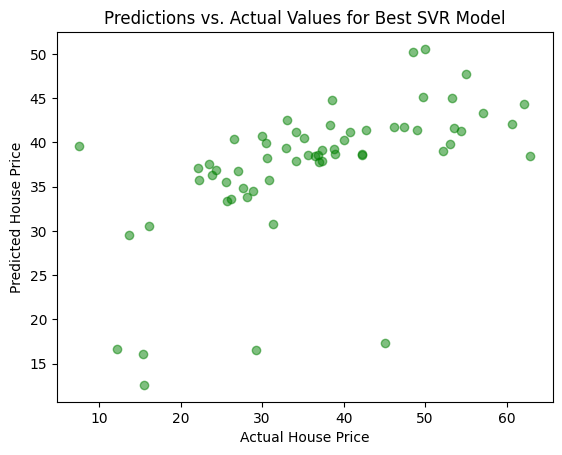

In [22]:
# scatter plot to visualize predictions against actual values
plt.scatter(y_validation, y_pred_best_model_validation, alpha=0.5, color='green')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Predictions vs. Actual Values for Best SVR Model")
plt.show()